## Bank Note Authentication Using DNN Tensorflow Classifier and RandomForest

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer) - Authentic 1 vs Fake 0

Where class indicates whether or not a Bank Note was authentic.


## Import Data Set

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('bank_note_data.csv')

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Explolatory Data Analysis(EDA)

### Countplot of the Classes (Authentic 1 vs Fake 0)

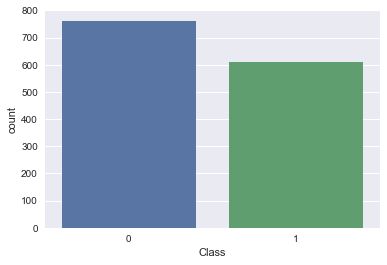

In [5]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='Class',data=data)

### Pairplot of DataSet

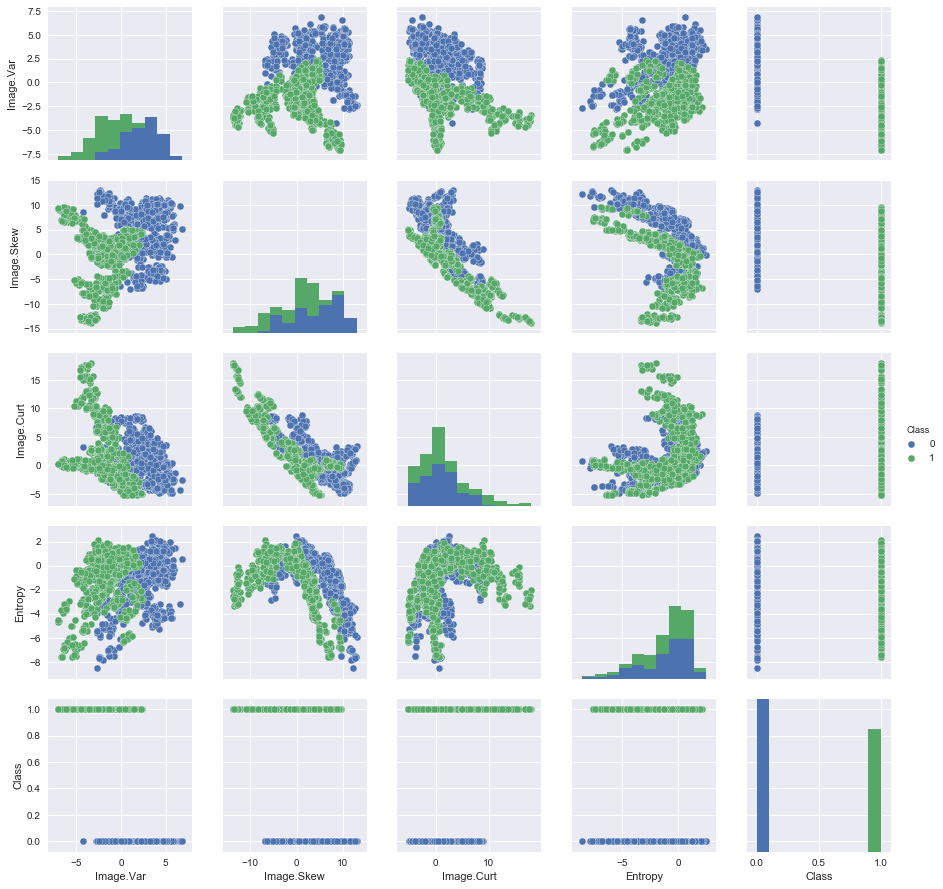

In [6]:
sns.pairplot(data,hue='Class')

## Data Preparation 


### Standard Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

In [12]:
#Converting Scaled Features to a DataFrame
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


### Train Test Split


In [14]:
x = df_feat

In [15]:
y = data['Class']

In [16]:
# Using the .as_matrix() methodin order for TensorFlow to accept the data in Numpy array form instead of a pandas series.
x = x.as_matrix()
y = y.as_matrix()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Using Tensorflow and Contrib.learn


In [19]:
import tensorflow as tf

In [20]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)

In [22]:
#Due to the Warning, Converting into float32
import numpy as np
x_train = np.float32(x_train)
x_test = np.float32(x_test)

In [23]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)

In [24]:
#Chossing a Dense Neural Network CLassifier(DNNClassifier) with random hidden layers of [10, 20, 10] 
#and classes as 2(Authentic 1 vs Fake 0) 

classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[10, 20, 10], n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001EDBF552518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\apoor\\AppData\\Local\\Temp\\tmp91or3yj2'}


In [26]:
classifier.fit(x_train, y_train, steps=200)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\apoor\AppData\Local\Temp\tmp91or3yj2\model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into C:\Users\apoor\AppData\Local\Temp\tmp91or3yj2\model.ckpt.
INFO:tensorflow:loss = 0.0193855, step = 201
INFO:tensorflow:global_step/sec: 172.608
INFO:tensorflow:loss = 0.0110293, step = 301 (0.581 sec)
INFO:tensorflow:Saving checkpoints for 400 into C:\Users\apoor\AppData\Local\Temp\tmp91or3yj2\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00748629.


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x000001EDBF552438>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000001EDBB860A60>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

## Model Evaluation


In [29]:
note_prediction = list(classifier.predict(x_test, as_iterable=True))

INFO:tensorflow:Restoring parameters from C:\Users\apoor\AppData\Local\Temp\tmp91or3yj2\model.ckpt-400


In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,note_prediction))

[[227   0]
 [  0 185]]


In [32]:
print(classification_report(y_test,note_prediction))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       227
          1       1.00      1.00      1.00       185

avg / total       1.00      1.00      1.00       412



#### 100% Accuracy from DNNClassifier.
#### Lets compare the same with Random Forest Classifier too

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=200)

In [36]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
rfc_preds = rfc.predict(x_test)

In [39]:
print(confusion_matrix(y_test,rfc_preds))

[[226   1]
 [  5 180]]


In [40]:
print(classification_report(y_test,rfc_preds))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99       227
          1       0.99      0.97      0.98       185

avg / total       0.99      0.99      0.99       412



#### So, one can conclude that DNNCLassifier of Tensorflow is more powerfull than Machine Learning Randon Forest Classifier